In [65]:
from IPython.display import display, Markdown
import re
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('results.csv')
df.head(1)

,id,submitdate,lastpage,startlanguage,seed,startdate,datestamp,consortium[berd],consortium[daphne4nfdi],consortium[dataplant],...,metadata[other],ontologies,sourcecode[none],sourcecode[private],sourcecode[gitlab],sourcecode[github],sourcecode[unsure],sourcecode[other],forward,contact
0,3,NaN,NaN,en,1373688864,2025-03-03 10:24:40,2025-03-03 10:24:40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df["startdate"] = pd.to_datetime(df["startdate"]).dt.date
date_series = df["startdate"].dropna()
mindate = date_series.min()
maxdate = date_series.max()
display("The survey responses were submitted between "+mindate.strftime('%d %B %Y')+" and "+maxdate.strftime('%d %B %Y')+".")


'The survey responses were submitted between 03 March 2025 and 24 March 2025.'

{'NFDI4ING': 10,
 'NFDI4CAT': 9,
 'NFDI4BIODIVERSITY': 8,
 'NFDI4CHEM': 6,
 'NFDIMATWERK': 6,
 'TEXT': 6,
 'BERD': 5,
 'NFDI4IMMUNO': 4,
 'NFDI4DATASCIENCE': 4,
 'KONSORTSWD': 4,
 'NFDI4MICROBIOTA': 3,
 'NFDI4HEALTH': 3,
 'NFDI4BIOIMAGE': 2,
 'NFDI4ENERGY': 2,
 'NFDI4CULTURE': 2,
 'NFDI4MEMORY': 1,
 'NFDI4OBJECTS': 1,
 'GHGA': 1,
 'NFDI4EARTH': 1,
 'DATAPLANT': 1,
 'FAIRMAT': 1,
 'FAIRAGRO': 0,
 'OTHER': 0,
 'NFDIXCS': 0,
 'PUNCH4NFDI': 0,
 'MARDI': 0,
 'DAPHNE4NFDI': 0}

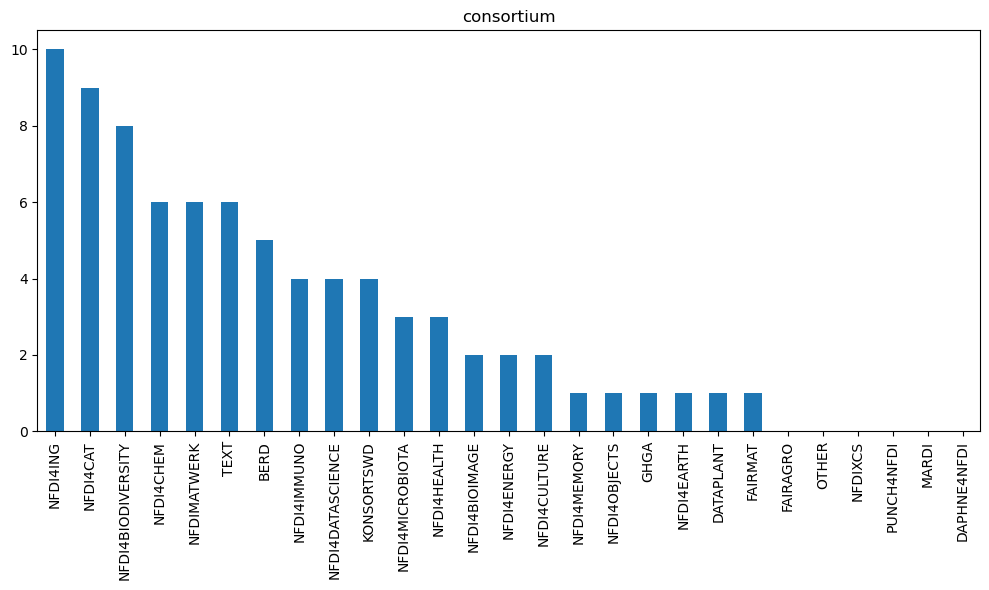

{'NFDI4ING': 10,
 'NFDI4CAT': 9,
 'NFDI4BIODIVERSITY': 8,
 'NFDI4CHEM': 6,
 'NFDIMATWERK': 6,
 'TEXT': 6,
 'BERD': 5,
 'NFDI4IMMUNO': 4,
 'NFDI4DATASCIENCE': 4,
 'KONSORTSWD': 4,
 'NFDI4MICROBIOTA': 3,
 'NFDI4HEALTH': 3,
 'NFDI4BIOIMAGE': 2,
 'NFDI4ENERGY': 2,
 'NFDI4CULTURE': 2,
 'NFDI4MEMORY': 1,
 'NFDI4OBJECTS': 1,
 'GHGA': 1,
 'NFDI4EARTH': 1,
 'DATAPLANT': 1,
 'FAIRMAT': 1,
 'FAIRAGRO': 0,
 'OTHER': 0,
 'NFDIXCS': 0,
 'PUNCH4NFDI': 0,
 'MARDI': 0,
 'DAPHNE4NFDI': 0}

In [95]:
def col_count(prefix):
    cols = {col for col in df.columns if isinstance(col, str) and col.startswith(prefix)}
    counts = {}
    for col in cols:
            new_col_name = re.sub(prefix+r"\[(.*)\]", lambda m: m.group(1).upper(), col)
            counts[new_col_name] = int((df[col] == 'Y').sum())
    sorted_counts  = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    display(sorted_counts)
    pd.Series(sorted_counts).plot(kind='bar', figsize=(10, 6), rot=90, title=prefix)
    plt.tight_layout()
    plt.show()
    return sorted_counts

col_count("consortium")


{'MANAGE': 35,
 'RESEARCHER': 33,
 'DEVELOPER': 25,
 'ADMINISTRATOR': 10,
 'STEWARD': 6,
 'UNSURE': 3,
 'OTHER': 0}

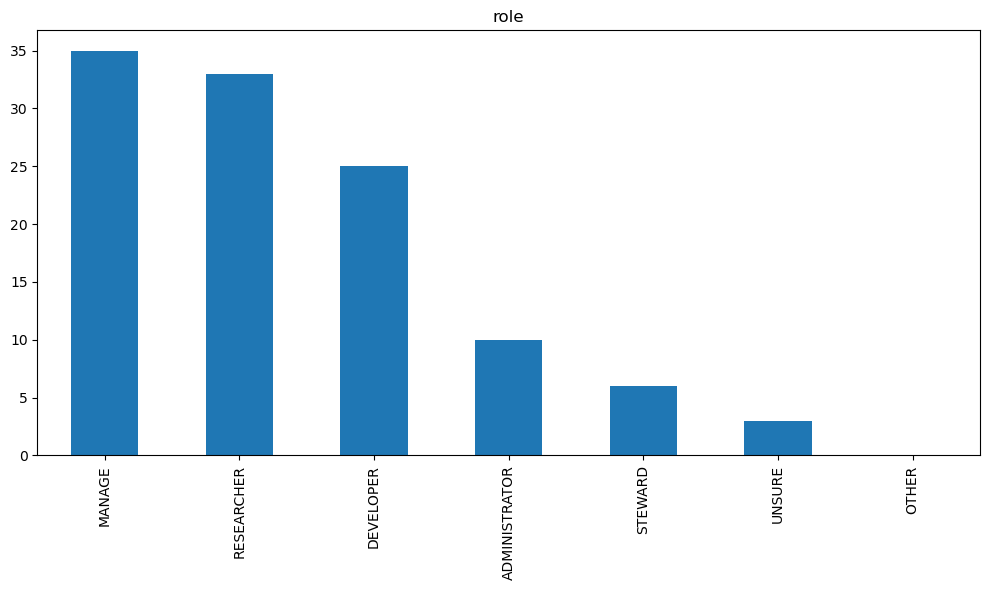

{'MANAGE': 35,
 'RESEARCHER': 33,
 'DEVELOPER': 25,
 'ADMINISTRATOR': 10,
 'STEWARD': 6,
 'UNSURE': 3,
 'OTHER': 0}

In [96]:
col_count("role")

{'BUILD': 12,
 'STRUCTURE': 11,
 'INFORMED': 11,
 'LINK': 7,
 'UNINTERESTED': 3,
 'STRUCTURECOMMENT': 0,
 'UNINTERESTEDCOMMENT': 0,
 'LINKCOMMENT': 0,
 'INFORMEDCOMMENT': 0,
 'OTHER': 0,
 'OTHERCOMMENT': 0,
 'BUILDCOMMENT': 0}

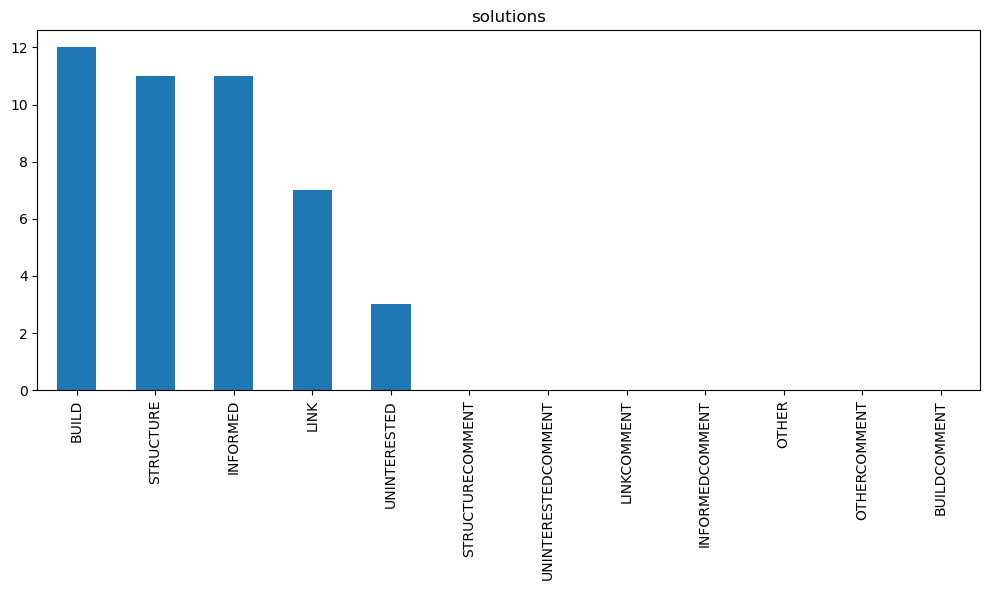

{'BUILD': 12,
 'STRUCTURE': 11,
 'INFORMED': 11,
 'LINK': 7,
 'UNINTERESTED': 3,
 'STRUCTURECOMMENT': 0,
 'UNINTERESTEDCOMMENT': 0,
 'LINKCOMMENT': 0,
 'INFORMEDCOMMENT': 0,
 'OTHER': 0,
 'OTHERCOMMENT': 0,
 'BUILDCOMMENT': 0}

In [97]:
col_count("solutions")

{'HOPE': 17, 'COMMUNITY': 14, 'WE': 14, 'NONE': 6, 'OTHER': 0}

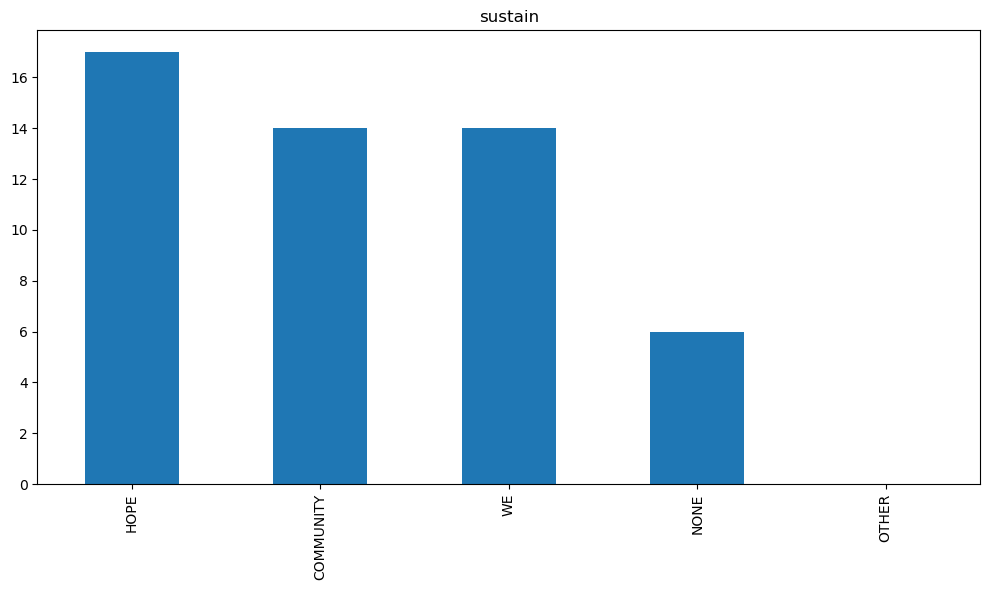

{'HOPE': 17, 'COMMUNITY': 14, 'WE': 14, 'NONE': 6, 'OTHER': 0}

In [98]:
col_count("sustain")

{'PUBLICATION': 26, 'WEBPAGE': 22, 'SOCIALMEDIA': 15, 'OTHER': 0}

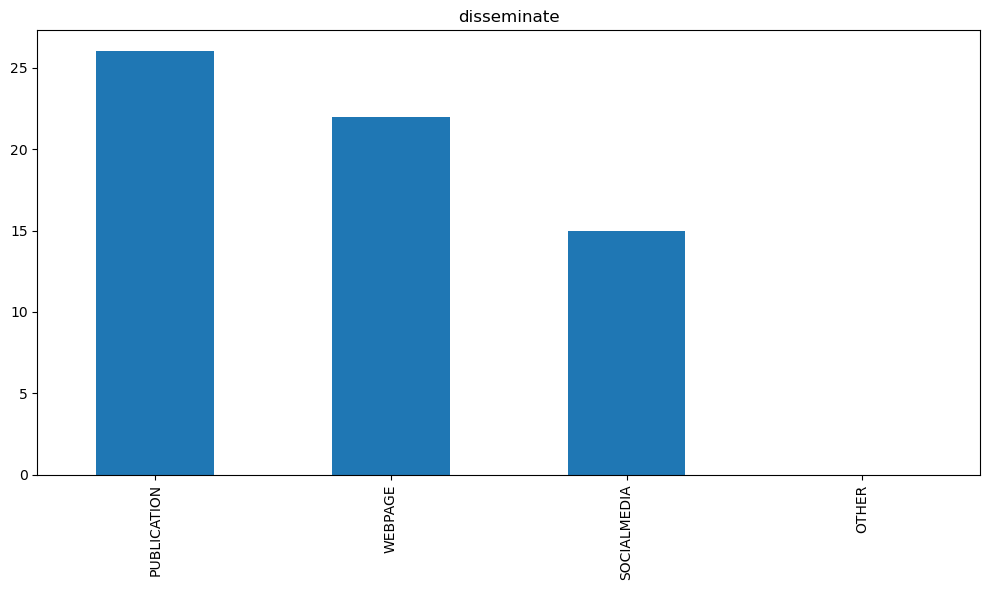

{'PUBLICATION': 26, 'WEBPAGE': 22, 'SOCIALMEDIA': 15, 'OTHER': 0}

In [99]:
col_count("disseminate")

{'CITATIONCFF': 11, 'CODEMETA': 7, 'ZENODOJSON': 5, 'OTHER': 0}

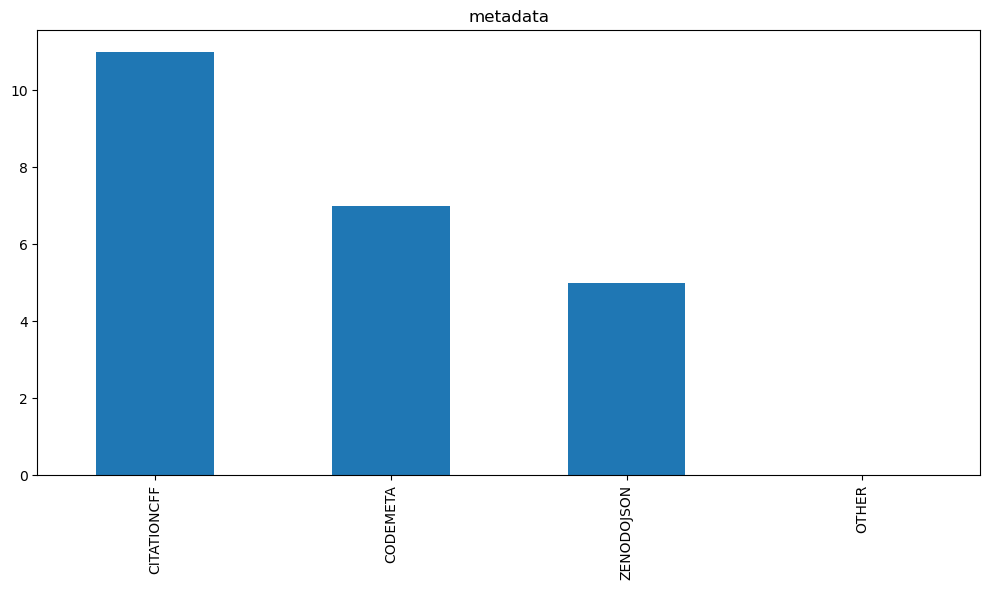

{'CITATIONCFF': 11, 'CODEMETA': 7, 'ZENODOJSON': 5, 'OTHER': 0}

In [100]:
col_count("metadata")

{'GITHUB': 27, 'GITLAB': 20, 'PRIVATE': 4, 'NONE': 3, 'UNSURE': 1, 'OTHER': 0}

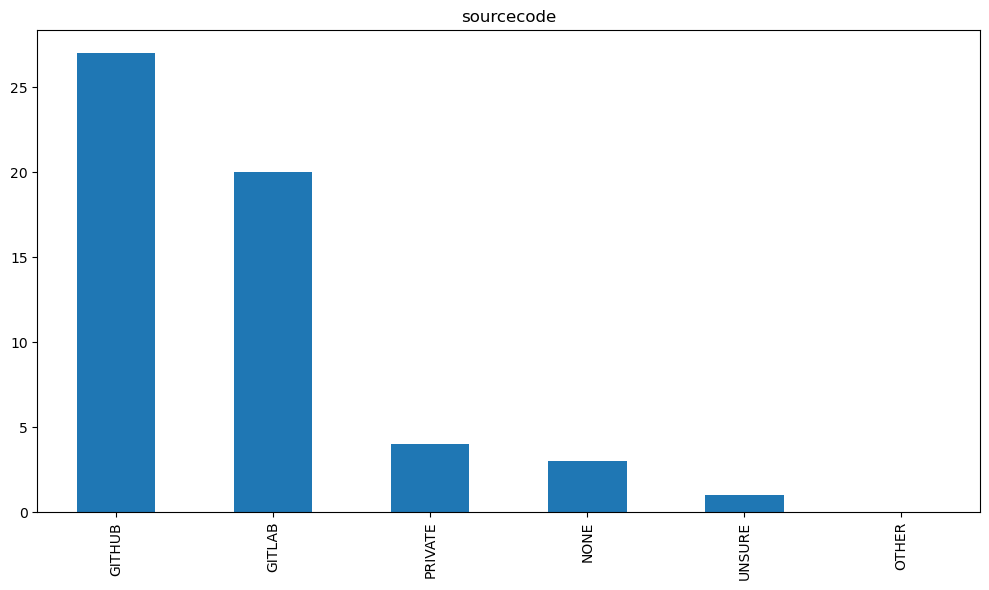

{'GITHUB': 27, 'GITLAB': 20, 'PRIVATE': 4, 'NONE': 3, 'UNSURE': 1, 'OTHER': 0}

In [101]:
col_count("sourcecode")

The problem with all those answers is that they are strongly biased by different participation ranging from 0 to 11 answers per consortium.
Thus we also look into the normalized values.
Ideally, there should be identical answers within each consortium but we suspect this won't be the case in practise, so we also look at the differences.
However the non-normalized values also shouldn't be discounted because if we assume participation is correlated with consortium size (or expressed in another way the probability of answering is not correlated by the consortium), then we can just treat the non-normalized values as samples from the whole of NFDI and the answers as based on the individual practises.
For example, if Persons A and B both belong to consortium C, and A answers GitHub and B answers GitLab to the source code question, then this doesn't need to mean that one got the answer wrong, just that there is no single answer that is valid for all people in that consortium.